In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
from sklearn.utils import shuffle

from datacube import Datacube
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from dea_plotting import map_shapefile
from dea_spatialtools import xr_rasterize

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random

from skimage.io import imread, imshow
from skimage.transform import resize

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dc = Datacube(app="Getting started")

IMG_WIDTH = 512
IMG_HEIGHT = IMG_WIDTH

linescan_datasets = dc.find_datasets(product='linescan')
linescan_datasets = sorted(linescan_datasets, key = lambda ds: (ds.center_time, ds.id))

def clean_name(name):
    if name is None:
        res = None
    else:
        if name.upper()[-4::] == ".JPG":
            res = name.upper()[:-4].replace(' ','_')
        else:
            res = name.upper().replace(' ','_')
    return res

vector_file = 'resources/fire_boundaries.shp'
gdf = gpd.read_file(vector_file)

gdf['SourceNameClean'] = gdf.apply(lambda row: clean_name(row.SourceName), axis=1)
gdf.dtUTC = gdf.apply(lambda row: datetime.strptime(row.dtUTC, '%Y-%m-%d %H:%M:%S'), axis=1)
gdf.dtLocal = gdf.apply(lambda row: datetime.strptime(row.dtLocal, '%Y-%m-%d %H:%M:%S'), axis=1)

test = pd.read_csv('resources/challenge1_test.csv', index_col='id')
test_labels = test.label.unique()

seed = 1337
nb_more_images = 7

datagen = ImageDataGenerator(
           shear_range=0.2,
           zoom_range=0.2,
           rotation_range=45,
           horizontal_flip=True,
           vertical_flip=True)

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
linescans_chelous = [
    "WALHALLA_378_P1_201902041304_MGA94_55",
    "MACALISTER91_615_P1_201903051438_MGA94_55",
    "MACALISTER_696_P1_201903091545_MGA94_55",
    "MACALISTER_697_P1_201903091555_MGA94_55",
    "MACALISTER_700_P1_201903091613_MGA94_55",
    "MACALISTER87_719_P1_201903100033_MGA94_55",
    "MACALISTER97_765_P1_201903131230_MGA94_55",
    "MACALISTER97_768_P1_201903131255_MGA94_55",
    "MACALISTER97_774_P1_201903141339_MGA94_55",
    "MACALISTER97_777_P1_201903141358_MGA94_55",
    "MACALISTER97_788_P1_201903151324_MGA94_55",
    "MACALISTER97_791_P1_201903151343_MGA94_55",
    "YARRA51_794_P1_201903151412_MGA94_55",
    "YARRA51_809_P1_201903161558_MGA94_55"]

composites_chelous = [
    "WALHALLA_397_P1_201902251311_MGA94_55",
    "MACALISTER91_681_P1_201903080517_MGA94_55",
    "MACALISTER85_684_P1_201903080536_MGA94_55",
    "MACALISTER91_685_P1_201903080539_MGA94_55",
    "MACALISTER97_803_P1_201903161455_MGA94_55",
    "MACALISTER91_752_P1_201903111601_MGA94_55",
    "MACALISTER91_755_P1_201903111619_MGA94_55",
    "MACALISTER91_760_P1_201903111709_MGA94_55",
    "MACALISTER91_761_P1_201903111720_MGA94_55",
    "MACALISTER91_762_P1_201903111730_MGA94_55",
    "MACALISTER91_783_P1_201903141643_MGA94_55",
    "MACALISTER91_804_P1_201903161503_MGA94_55",
    "MACALISTER91_805_P1_201903161517_MGA94_55",
    "MACALISTER91_808_P1_201903161539_MGA94_55",
    "MACALISTER99_646_P1_201903070440_MGA94_55",
    "MACALISTER91_648_P1_201903070444_MGA94_55",
    "MACALISTER91_99_649_P1_201903070453_MGA94_55",
    "MACALISTER_696_P1_201903091545_MGA94_55",
    "MACALISTER_697_P1_201903091555_MGA94_55",
    "MACALISTER_700_P1_201903091613_MGA94_55",
    "WALHALLA_380_P1_201902061347_MGA94_55",
    "WALHALLA_381_P1_201902061356_MGA94_55"
]

In [3]:
linescans_size = 0

for i in range(len(linescan_datasets)):
    sample = linescan_datasets[i]
    fname = sample.metadata_doc['label']
    
    if sum(gdf.SourceNameClean == fname) != 0 and fname not in linescans_chelous:
        linescans_size += 1 
        
linescans_size = (nb_more_images + 1) * linescans_size + len(linescans_chelous)

def reverse(function, image, mask):
    image_r = function(image)
    mask_r = function(mask)
    X = image_r
    Y = np.expand_dims(mask_r, axis=-1)
    
    return X, Y

ABERFELDY_WEST_200_P1_201901260955_MGA94_55
Rasterizing to match xarray.DataArray dimensions (777, 1171)


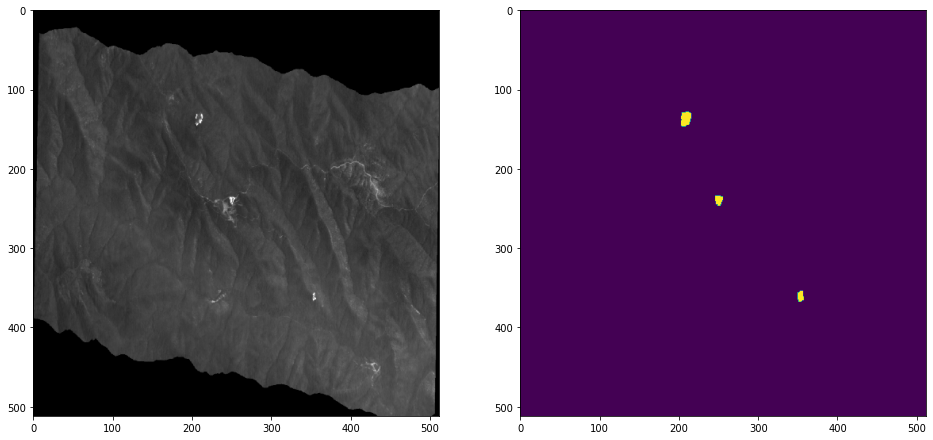

ABERFELDY_WEST_214_P1_201901261750_MGA94_55
Rasterizing to match xarray.DataArray dimensions (1297, 3333)


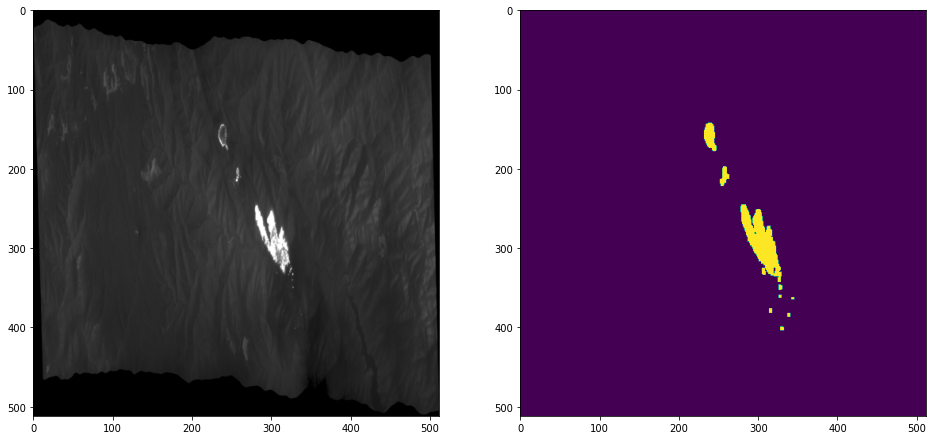

CREAM_JIM_JORDAN_217_P1_201901262218_MGA94_55
Rasterizing to match xarray.DataArray dimensions (1873, 2125)


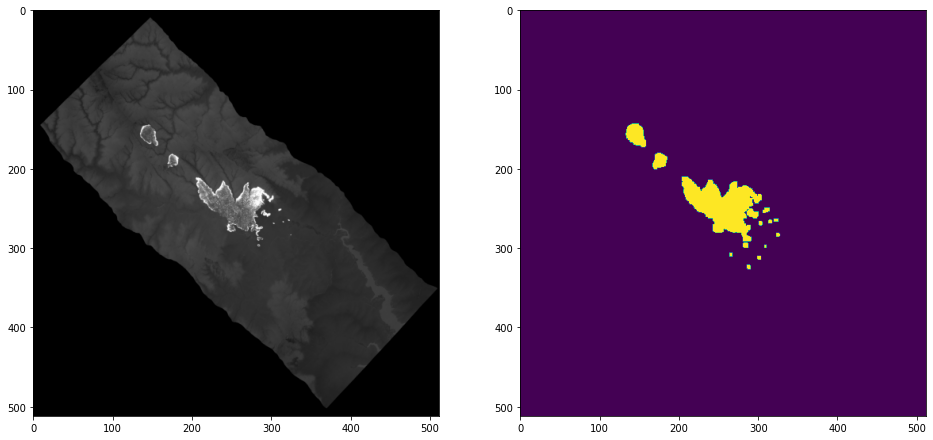

JORDAN_231_P1_201901271500_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2052, 2196)


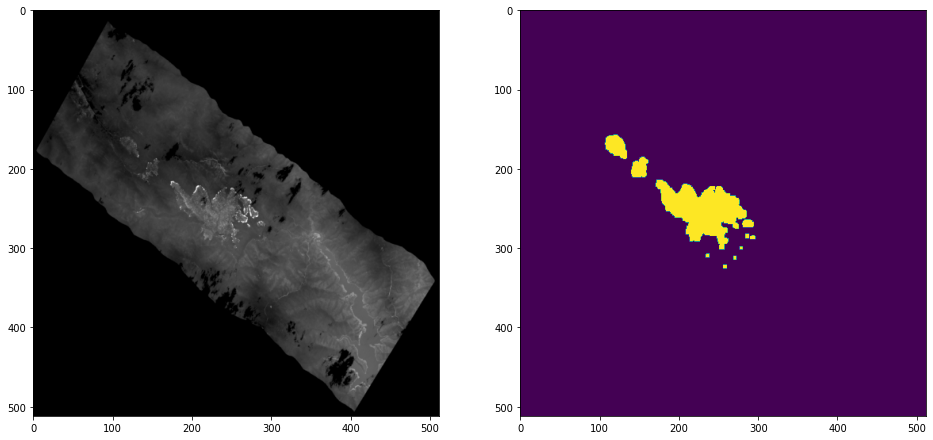

JORDAN_234_P1_201901271901_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2022, 2435)


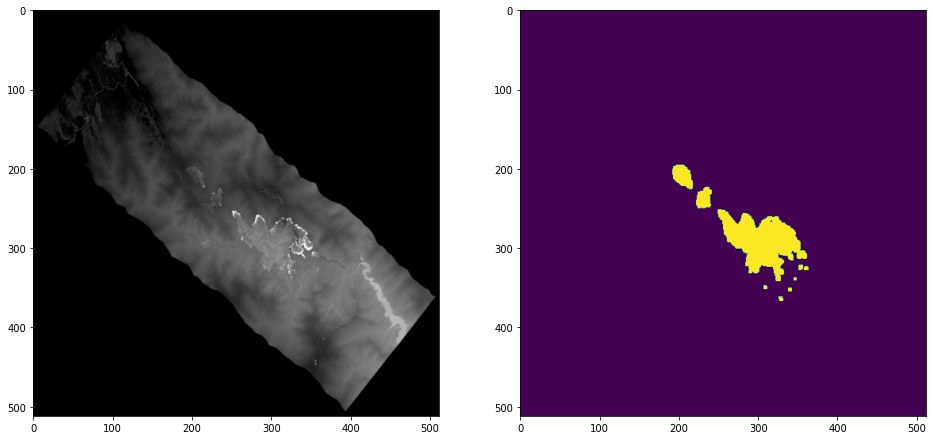

JORDAN_264_P1_201901301524_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2295, 1799)


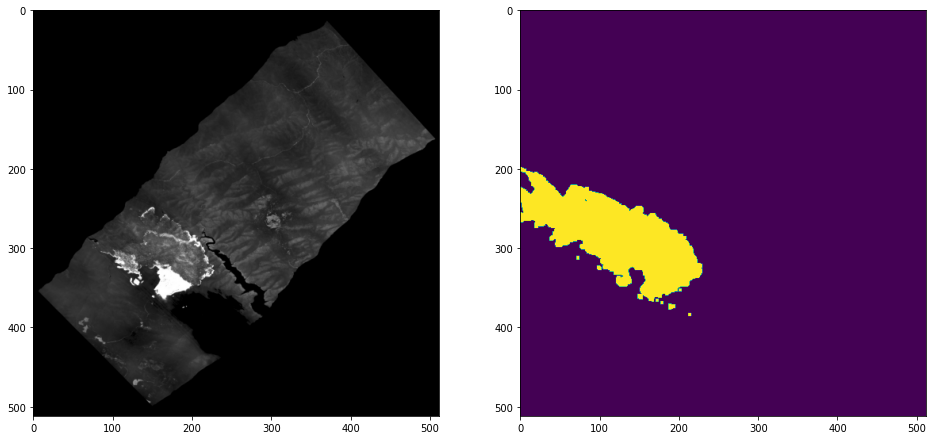

MCCALLISTER79_LA_TROBE_97_266_P1_201901301552_MGA94_55
Rasterizing to match xarray.DataArray dimensions (1908, 2142)


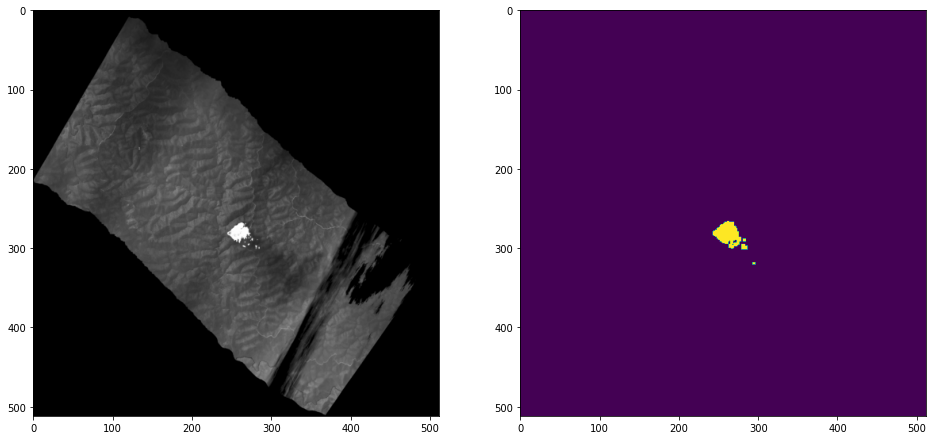

LA_TROBE_97_MCCALLISTER_79_268_P1_201901301611_MGA94_55
Rasterizing to match xarray.DataArray dimensions (1963, 2224)


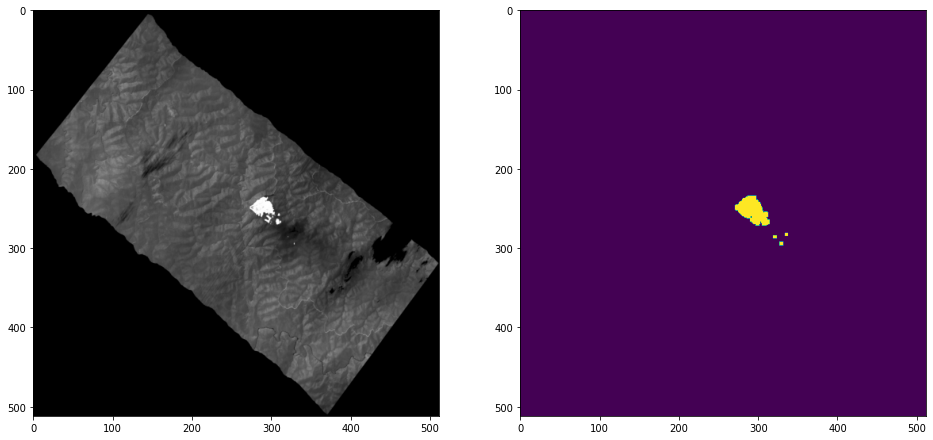

WALHALLA_295_P1_201902011156_MGA94_55
Rasterizing to match xarray.DataArray dimensions (1753, 1934)


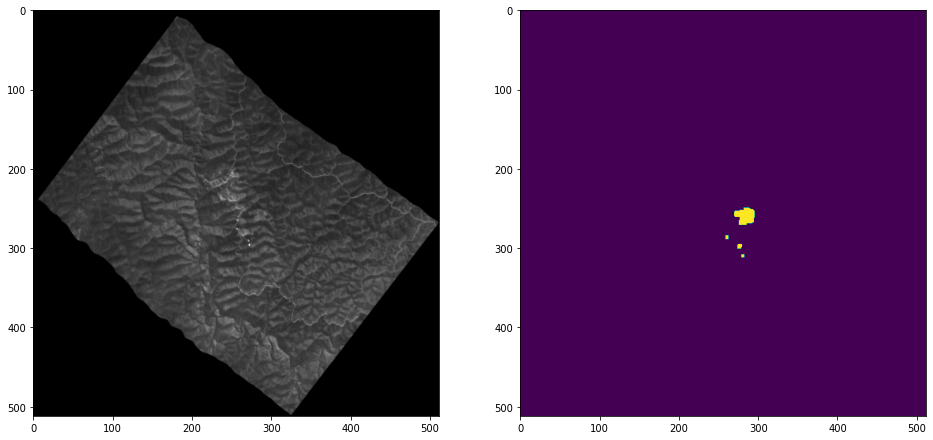

JORDAN_310_P1_201902012046_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3314, 1683)


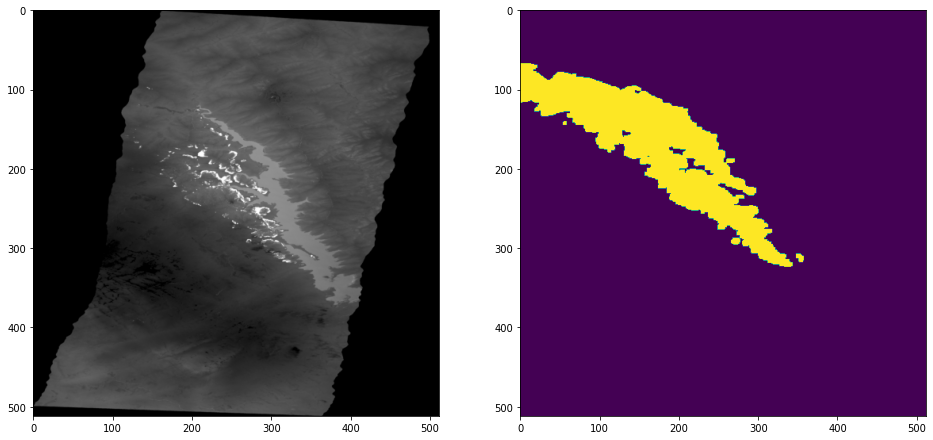

WALHALLA_339_P1_201902030520_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2440, 2132)


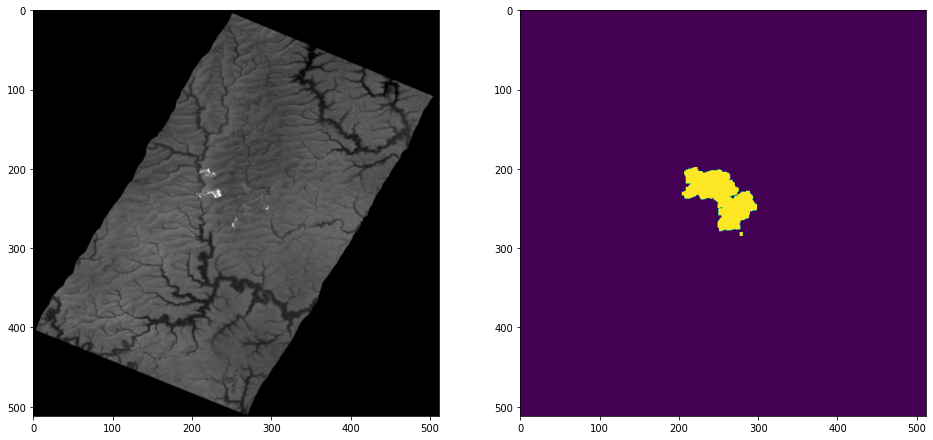

WALHALLA_378_P1_201902041304_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2847, 2720)


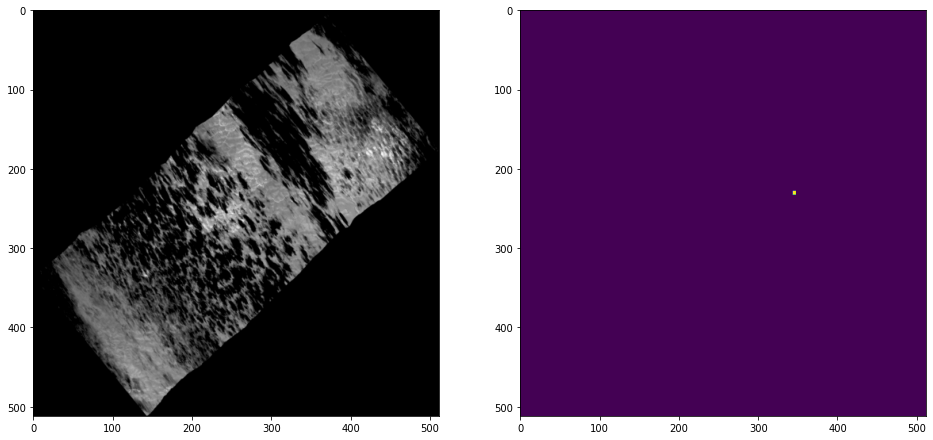

MACALISTER91_615_P1_201903051438_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3509, 3770)


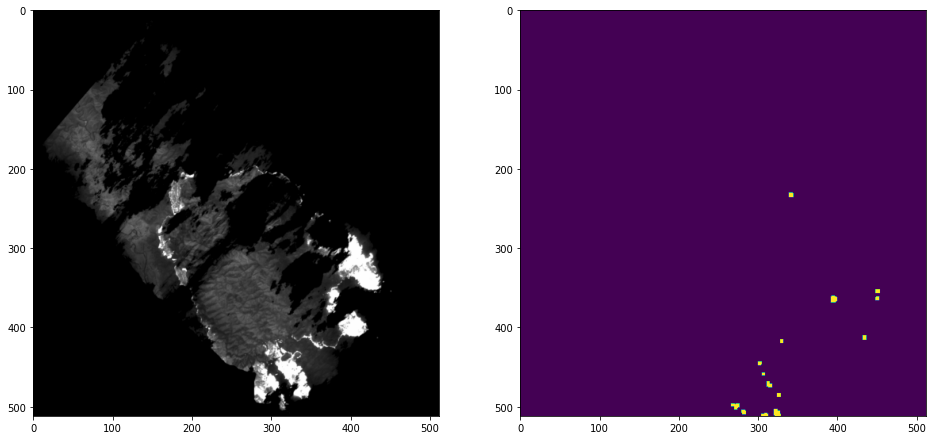

YARRA51_620_P1_201903051812_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3981, 2973)


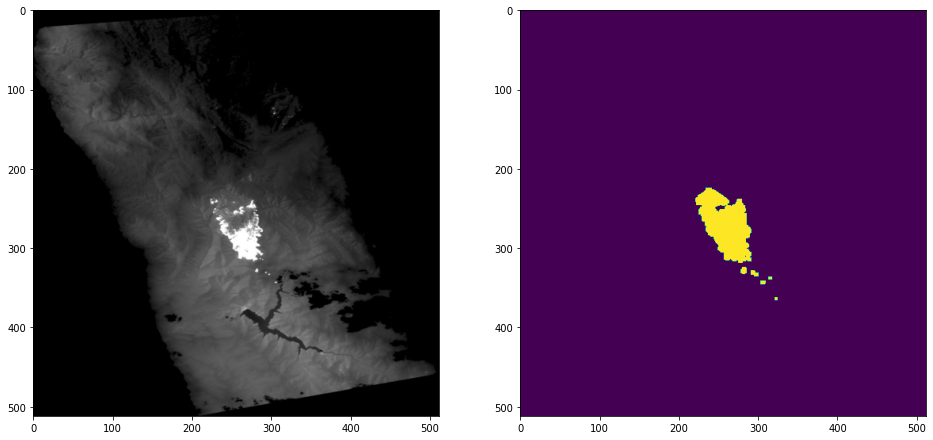

MACALISTER99_623_P1_201903051858_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3736, 3548)


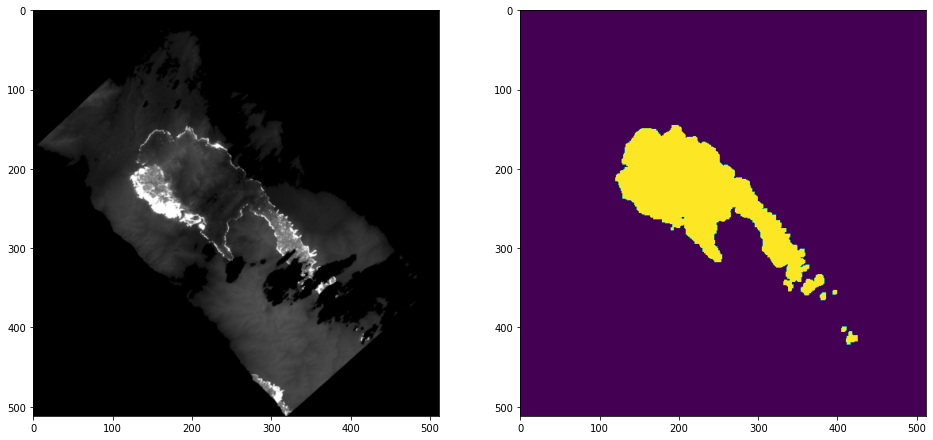

MACALISTER85_624_P1_201903051907_MGA94_55
Rasterizing to match xarray.DataArray dimensions (4124, 3915)


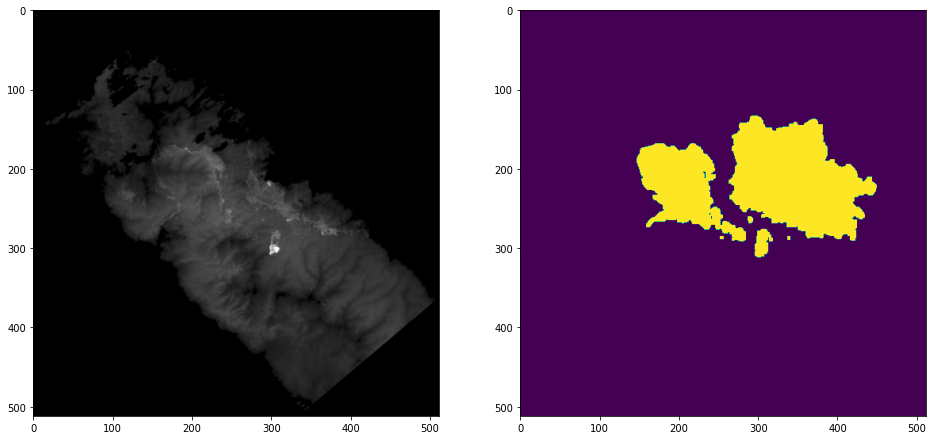

YARRA51_633_P1_201903061644_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3531, 2005)


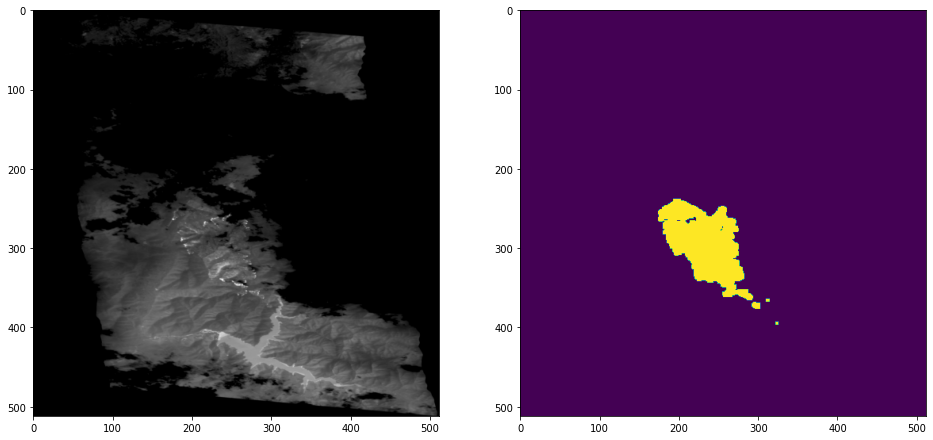

MACALISTER97_680_P1_201903080512_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2855, 2389)


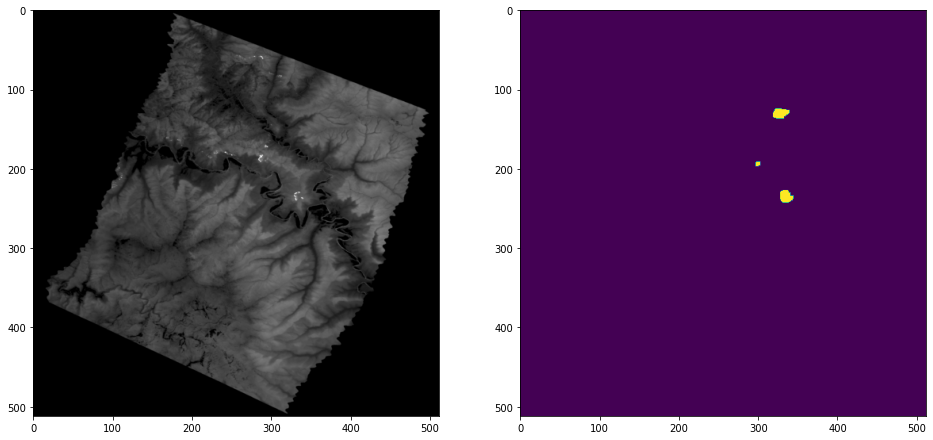

MACALISTER99_683_P1_201903080529_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3075, 2637)


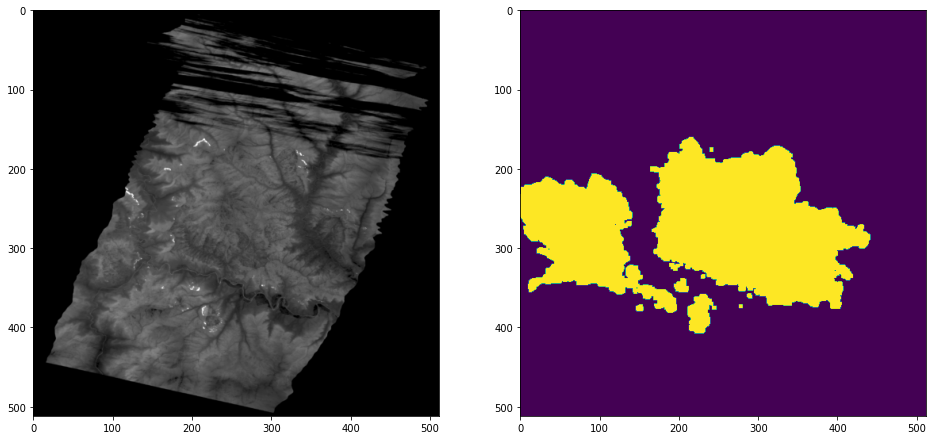

MACALISTER_696_P1_201903091545_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3313, 2770)


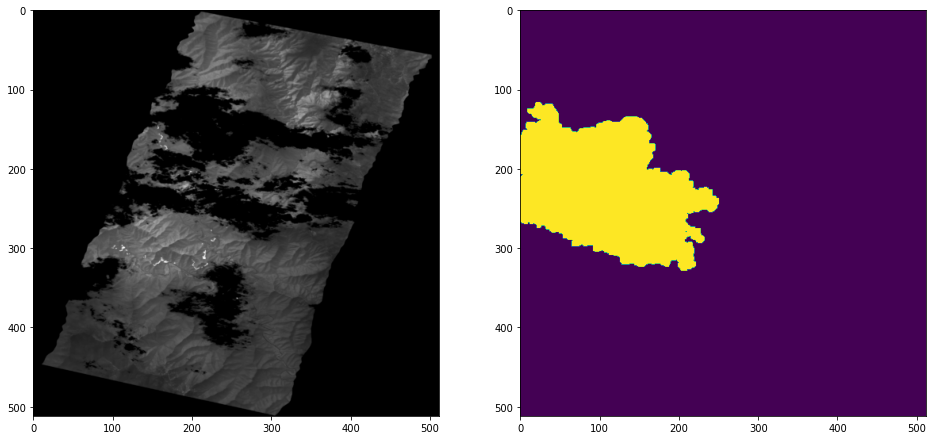

MACALISTER_697_P1_201903091555_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3924, 2792)


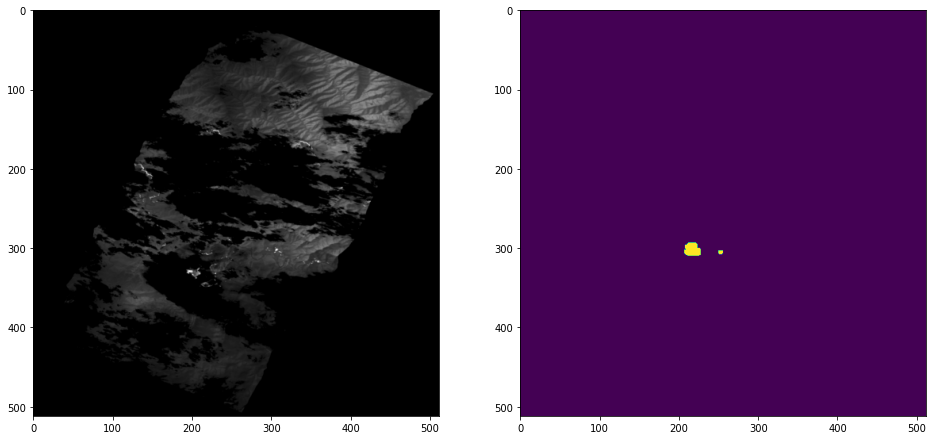

MACALISTER_700_P1_201903091613_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2864, 2625)


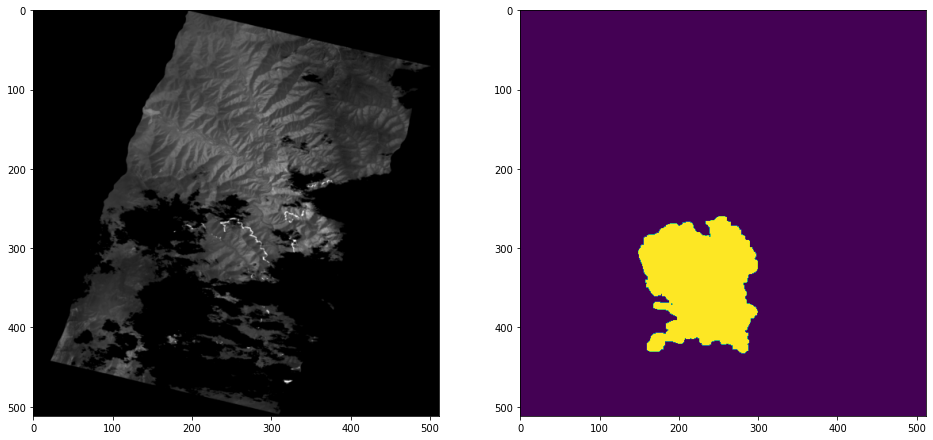

YARRA51_704_P1_201903091659_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3164, 2068)


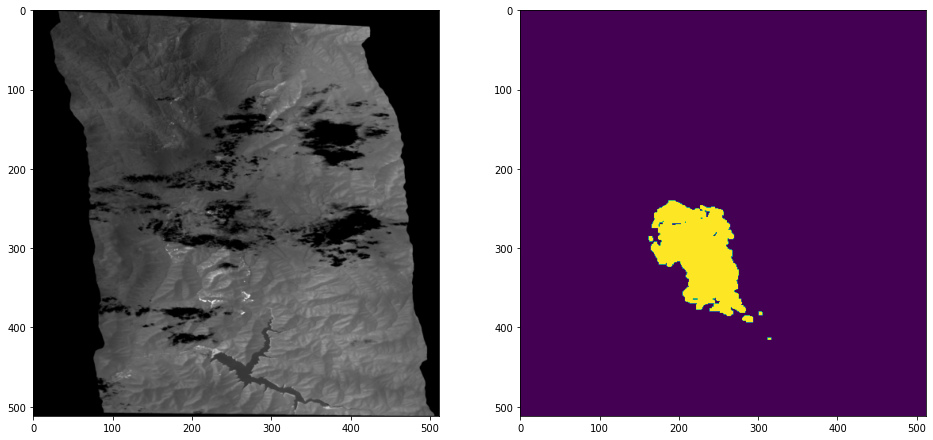

MACALISTER87_719_P1_201903100033_MGA94_55
Rasterizing to match xarray.DataArray dimensions (4447, 3094)


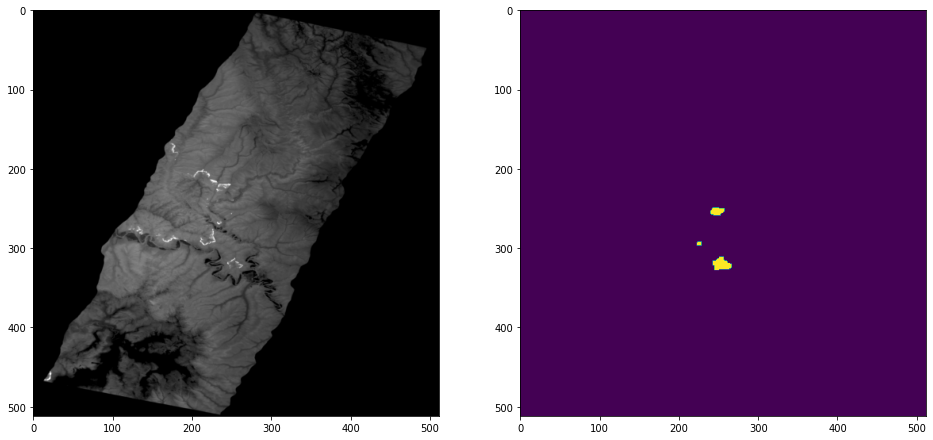

MACALISTER97_720_P1_201903100042_MGA94_55
Rasterizing to match xarray.DataArray dimensions (2844, 2291)


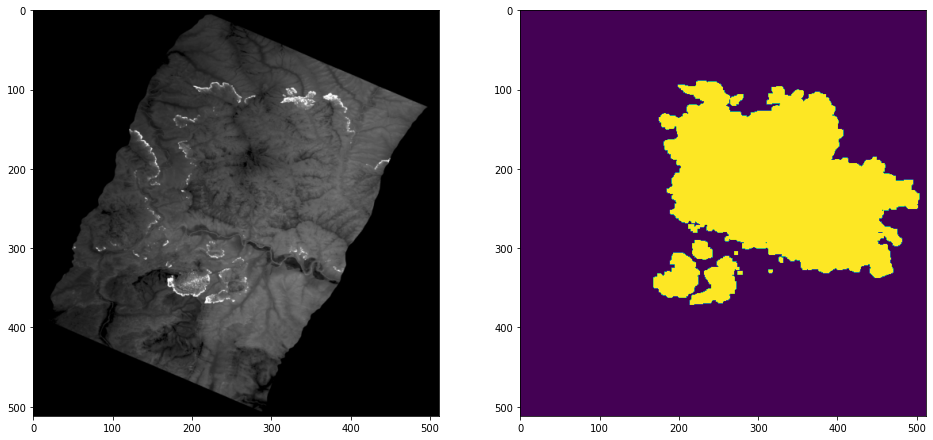

MACALISTER85_723_P1_201903100101_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3512, 2711)


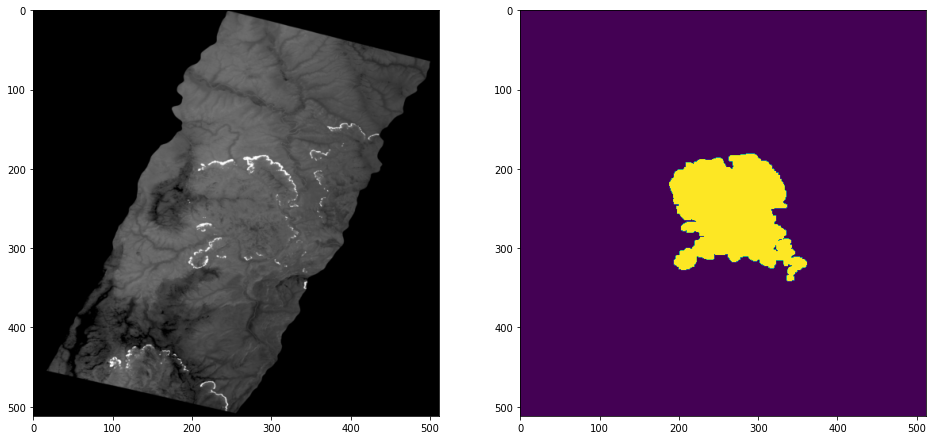

YARRA51_726_P1_201903100129_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3416, 1878)


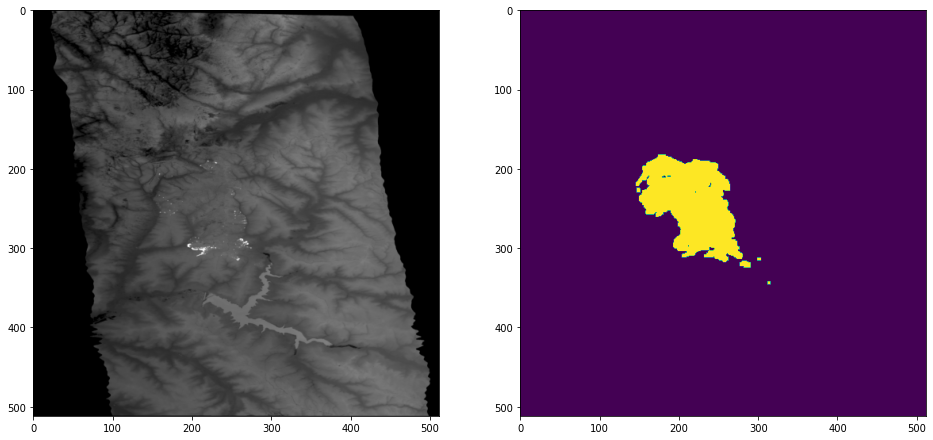

MACALISTER97_765_P1_201903131230_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3210, 2264)


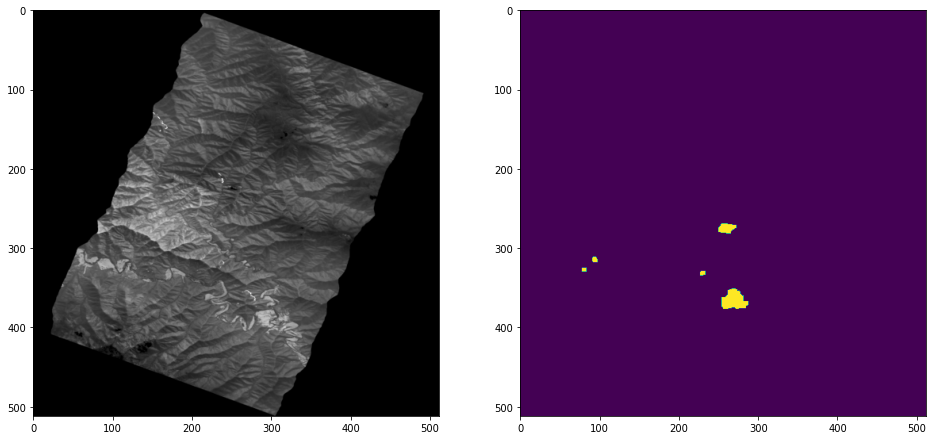

MACALISTER97_768_P1_201903131255_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3049, 2434)


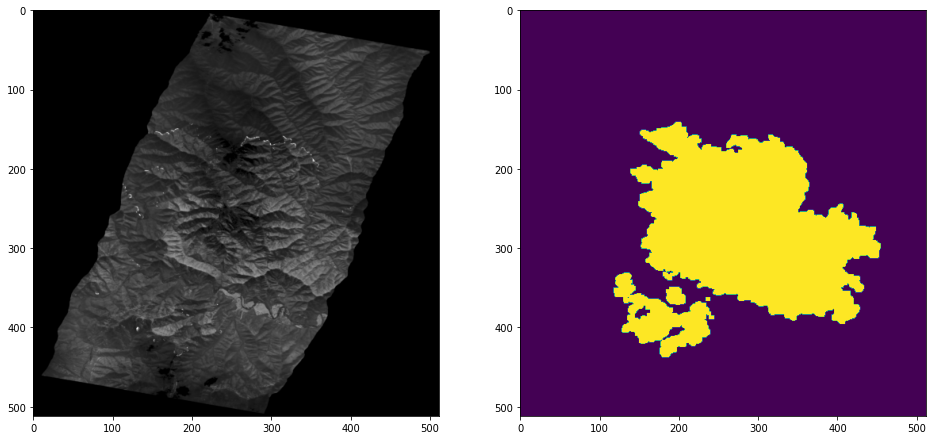

MACALISTER97_769_P1_201903131306_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3052, 2171)


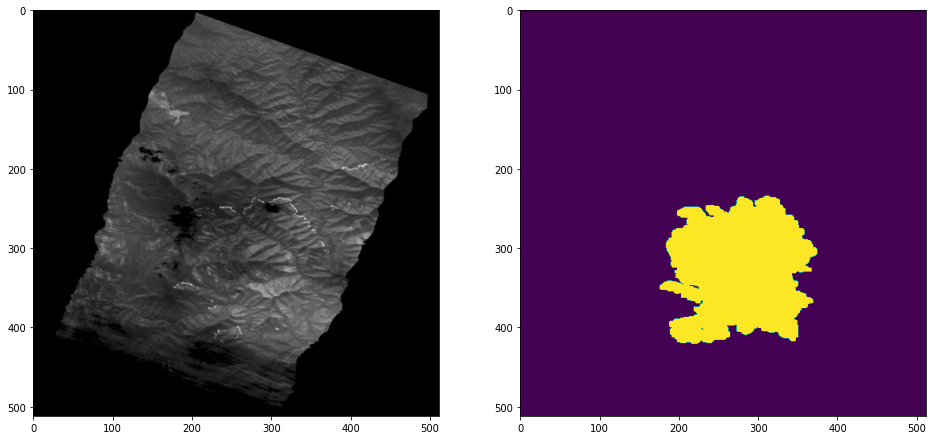

MACALISTER97_774_P1_201903141339_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3127, 2378)


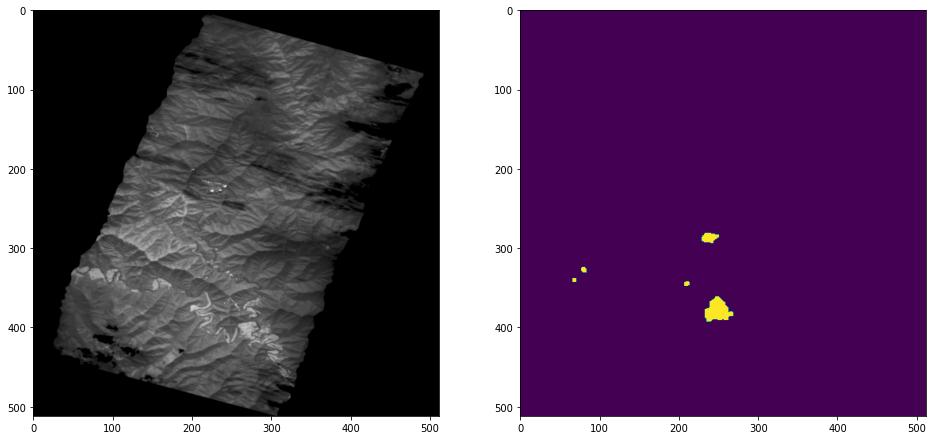

MACALISTER97_777_P1_201903141358_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3266, 2371)


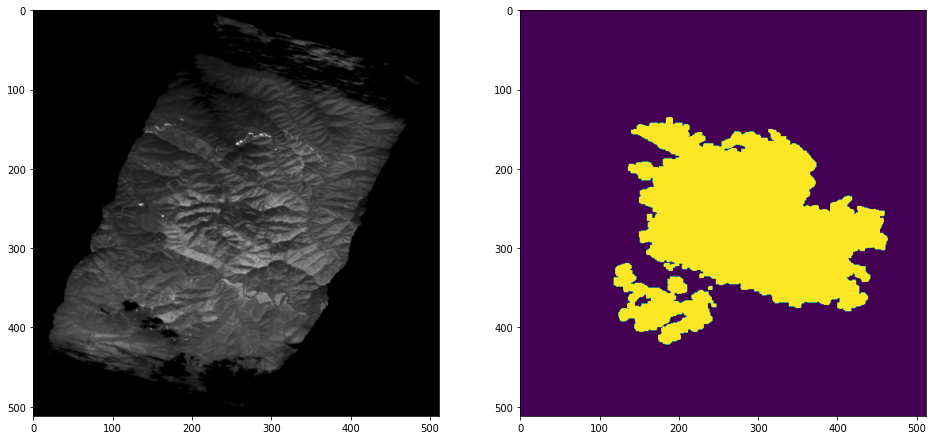

MACALISTER97_778_P1_201903141405_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3132, 2352)


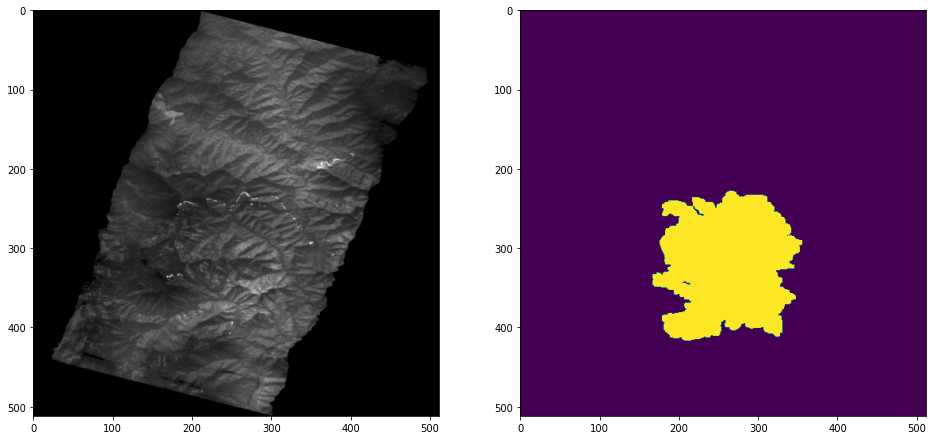

MACALISTER97_788_P1_201903151324_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3002, 2469)


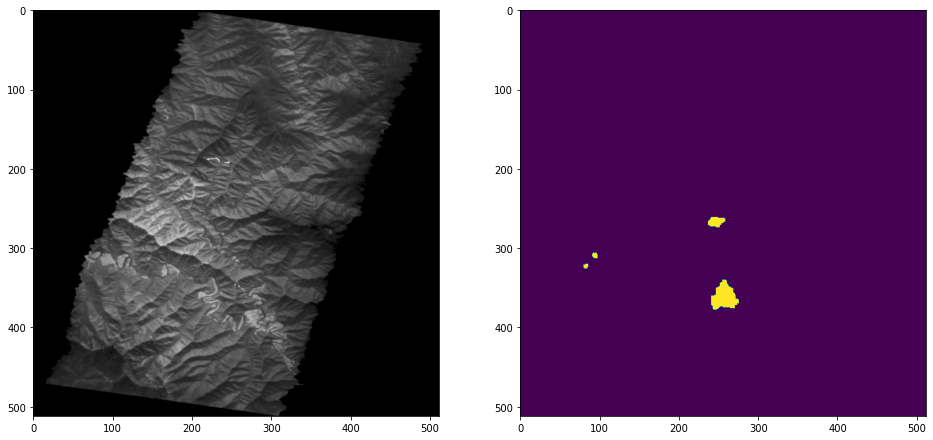

MACALISTER97_791_P1_201903151343_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3483, 2252)


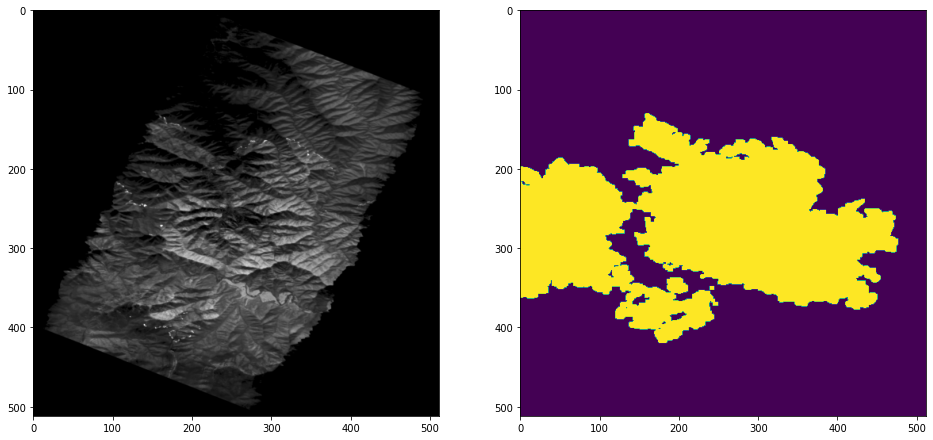

YARRA51_794_P1_201903151412_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3381, 1795)


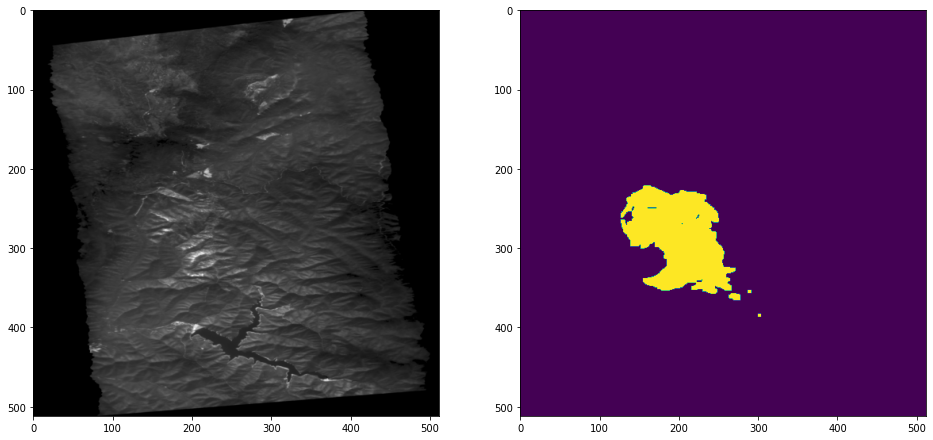

YARRA51_809_P1_201903161558_MGA94_55
Rasterizing to match xarray.DataArray dimensions (3344, 1848)


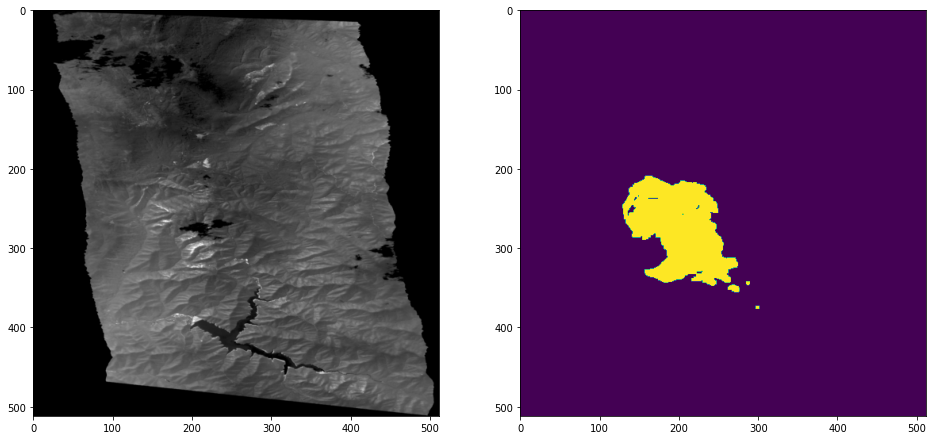

In [4]:
X_train1 = np.zeros((linescans_size, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
Y_train1 = np.zeros((linescans_size, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

n = 0

for i in range(len(linescan_datasets)):
    sample = linescan_datasets[i]
    fname = sample.metadata_doc['label']
    
    if sum(gdf.SourceNameClean == fname) != 0 and fname not in test_labels:
        print(fname)
        
        ob = gdf.loc[gdf.SourceNameClean == fname]
        src = dc.load(product='linescan', id=sample.id, output_crs='epsg:28355', resolution=(-10,10))
        image = src.linescan.values[0]
        image = np.stack((image,)*3, axis=-1).astype(float)
        mask = xr_rasterize(gdf=ob, da=src).values.astype(float)
        
        image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        mask = np.expand_dims(mask, axis=-1)
        
        x_min = np.min(image)
        x_max = np.max(image)
        f = lambda x: ((x - x_min) / (x_max - x_min))
        X_train1[n] = f(image) * 255.0
        Y_train1[n] = mask
        
        f = plt.figure()
        f.set_figheight(16)
        f.set_figwidth(16)
        f.add_subplot(1, 2, 1)
        plt.imshow(X_train1[n])
        f.add_subplot(1, 2, 2)
        plt.imshow(np.squeeze(Y_train1[n]))
        plt.show(block=True)
        
        sample_image = expand_dims(X_train1[n], 0)
        it_image = datagen.flow(sample_image, batch_size=1, seed=seed)
        sample_mask = expand_dims(Y_train1[n], 0)
        it_mask = datagen.flow(sample_mask, batch_size=1, seed=seed)

        if fname not in linescans_chelous:
            for i in range(nb_more_images):
                n += 1
                batch_image = it_image.next()
                img = batch_image[0]
                batch_mask = it_mask.next()
                msk = batch_mask[0].astype('bool')
                X_train1[n] = img
                Y_train1[n] = msk

        n += 1
        
Y_train1 = Y_train1.astype(bool)
X_train1, Y_train1 = shuffle(X_train1, Y_train1)

In [5]:
'''
composites = gdf[gdf.SourceName.str.upper().str.contains(",|&|(COMPOSITE)", na=False)]

def composite_polygons(composite_name):
    composite_name = composite_name.replace("(", "")
    composite_name = composite_name.replace(")", "")
    split_underscore = composite_name.split("_")
    split_coma = []
    for s in split_underscore:
        split = s.split(",")
        for ss in split:
            split_coma.append(ss)
    result= []
    for e in split_coma:
        if e.isnumeric():
            new_e = int(e)
            if new_e < 1000:
                result.append(new_e)
    return result

def match_composite_linescan(l):
    result = []
    for i in range(len(linescan_datasets)):
        sample = linescan_datasets[i]
        fname = sample.metadata_doc['label']
        for e in l:
            if ("_"+str(e)+"_") in fname :
                result.append(fname)

    return result

composite_size = 0

for composite in composites['SourceNameClean'].unique():
    ob = gdf.loc[gdf.SourceNameClean == composite]
    
    result = composite_polygons(composite)
    linescans = match_composite_linescan(result)
    
    for linescan in linescans:
        if linescan not in composites_chelous:
            composite_size += 1 
        
composite_size = (nb_more_images + 1) * composite_size + len(composites_chelous)
'''

'\ncomposites = gdf[gdf.SourceName.str.upper().str.contains(",|&|(COMPOSITE)", na=False)]\n\ndef composite_polygons(composite_name):\n    composite_name = composite_name.replace("(", "")\n    composite_name = composite_name.replace(")", "")\n    split_underscore = composite_name.split("_")\n    split_coma = []\n    for s in split_underscore:\n        split = s.split(",")\n        for ss in split:\n            split_coma.append(ss)\n    result= []\n    for e in split_coma:\n        if e.isnumeric():\n            new_e = int(e)\n            if new_e < 1000:\n                result.append(new_e)\n    return result\n\ndef match_composite_linescan(l):\n    result = []\n    for i in range(len(linescan_datasets)):\n        sample = linescan_datasets[i]\n        fname = sample.metadata_doc[\'label\']\n        for e in l:\n            if ("_"+str(e)+"_") in fname :\n                result.append(fname)\n\n    return result\n\ncomposite_size = 0\n\nfor composite in composites[\'SourceNameClean\'

In [6]:
'''X_train2 = np.zeros((composite_size, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)
Y_train2 = np.zeros((composite_size, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

n = 0

for composite in composites['SourceNameClean'].unique():
    ob = gdf.loc[gdf.SourceNameClean == composite]
    
    result = composite_polygons(composite)
    linescans = match_composite_linescan(result)
    
    for linescan in linescans:
        print(linescan)
        
        if linescan not in test_labels:     
            src = dc.load(product='linescan', label=linescan, output_crs='epsg:28355', resolution=(-10,10))
            image = src.linescan.values[0]
            image = np.stack((image,)*3, axis=-1).astype(float)
            mask = xr_rasterize(gdf=ob, da=src).values.astype(float)

            image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            mask = np.expand_dims(mask, axis=-1)
        
            x_min = np.min(image)
            x_max = np.max(image)
            f = lambda x: ((x - x_min) / (x_max - x_min))
            X_train2[n] = f(image) * 255.0
            Y_train2[n] = mask
            
            f = plt.figure()
            f.set_figheight(16)
            f.set_figwidth(16)
            f.add_subplot(1, 2, 1)
            plt.imshow(X_train2[n])
            f.add_subplot(1, 2, 2)
            plt.imshow(np.squeeze(Y_train2[n]))
            plt.show(block=True)
        
            sample_image = expand_dims(X_train2[n], 0)
            it_image = datagen.flow(sample_image, batch_size=1, seed=seed)
            sample_mask = expand_dims(Y_train2[n], 0)
            it_mask = datagen.flow(sample_mask, batch_size=1, seed=seed)

            if linescan not in composites_chelous:
                for i in range(nb_more_images):
                    n += 1
                    batch_image = it_image.next()
                    img = batch_image[0]
                    batch_mask = it_mask.next()
                    msk = batch_mask[0].astype('bool')
                    X_train1[n] = img
                    Y_train1[n] = msk

            n += 1
        
Y_train2 = Y_train2.astype(bool)
X_train2, Y_train2 = shuffle(X_train2, Y_train2) 
'''

"X_train2 = np.zeros((composite_size, IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)\nY_train2 = np.zeros((composite_size, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)\n\nn = 0\n\nfor composite in composites['SourceNameClean'].unique():\n    ob = gdf.loc[gdf.SourceNameClean == composite]\n    \n    result = composite_polygons(composite)\n    linescans = match_composite_linescan(result)\n    \n    for linescan in linescans:\n        print(linescan)\n        \n        if linescan not in test_labels:     \n            src = dc.load(product='linescan', label=linescan, output_crs='epsg:28355', resolution=(-10,10))\n            image = src.linescan.values[0]\n            image = np.stack((image,)*3, axis=-1).astype(float)\n            mask = xr_rasterize(gdf=ob, da=src).values.astype(float)\n\n            image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)\n            mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)\n            ma

In [7]:
'''
X_train = np.concatenate((X_train1, X_train2))
Y_train = np.concatenate((Y_train1, Y_train2))
'''
X_train = X_train1
Y_train = Y_train1

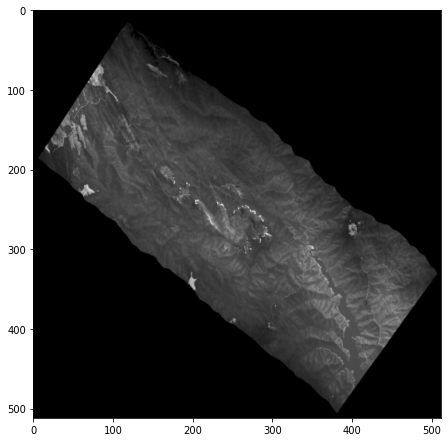

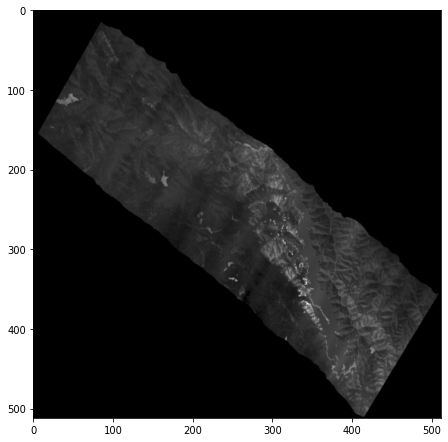

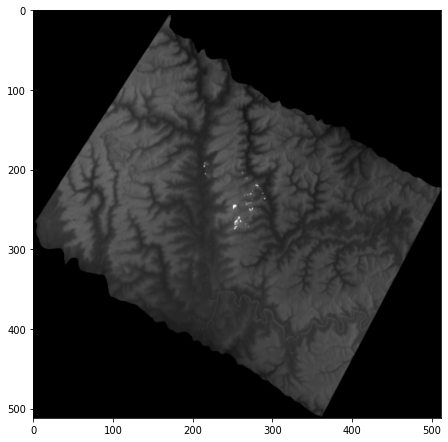

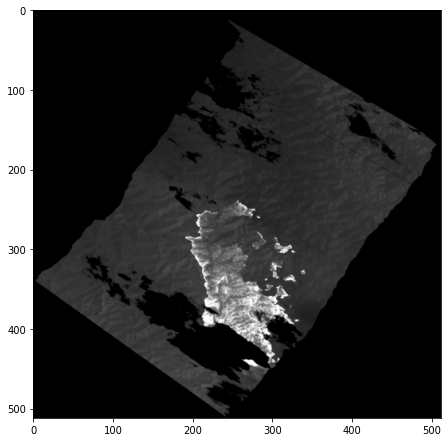

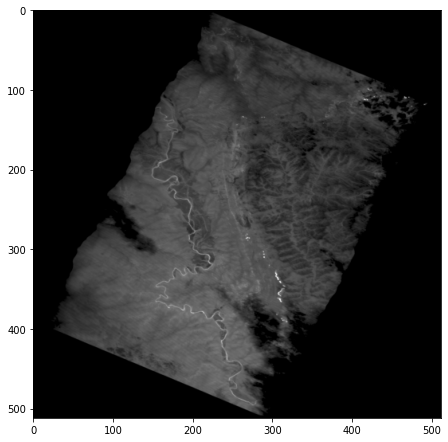

In [8]:
test = pd.read_csv('resources/challenge1_test.csv', index_col='id')
fnames = test.label.unique()
X_test = np.zeros((len(fnames), IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8)

n = 0

for file_stem in fnames:
    src = dc.load(product='linescan', label=file_stem, output_crs='epsg:28355', resolution=(-10,10))
    image = src.linescan.values[0] 
    image = np.stack((image,)*3, axis=-1).astype(float)
    image = resize(image, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    x_min = np.min(image)
    x_max = np.max(image)
    f = lambda x: ((x - x_min) / (x_max - x_min))
    X_test[n] = f(image) * 255.0

    f = plt.figure()
    f.set_figheight(7.5)
    f.set_figwidth(7.5)
    plt.imshow(X_test[n])
    plt.show()
    
    n += 1

In [9]:
np.save('X_test_512_norm_no_composites', X_test)
np.savez_compressed('train_512_norm', a=X_train, b=Y_train)